##
## House Prices: Advanced Regression Techniques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Full Data, and Data Cleaning

In [6]:
full = train.merge(test, how='outer')

In [7]:
full.Alley.fillna('NoAlley', inplace=True)

In [8]:
full.LotFrontage.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<ipython-input-9-6b46680801fb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full.LotFrontage.dropna())


<Axes: xlabel='LotFrontage', ylabel='Density'>

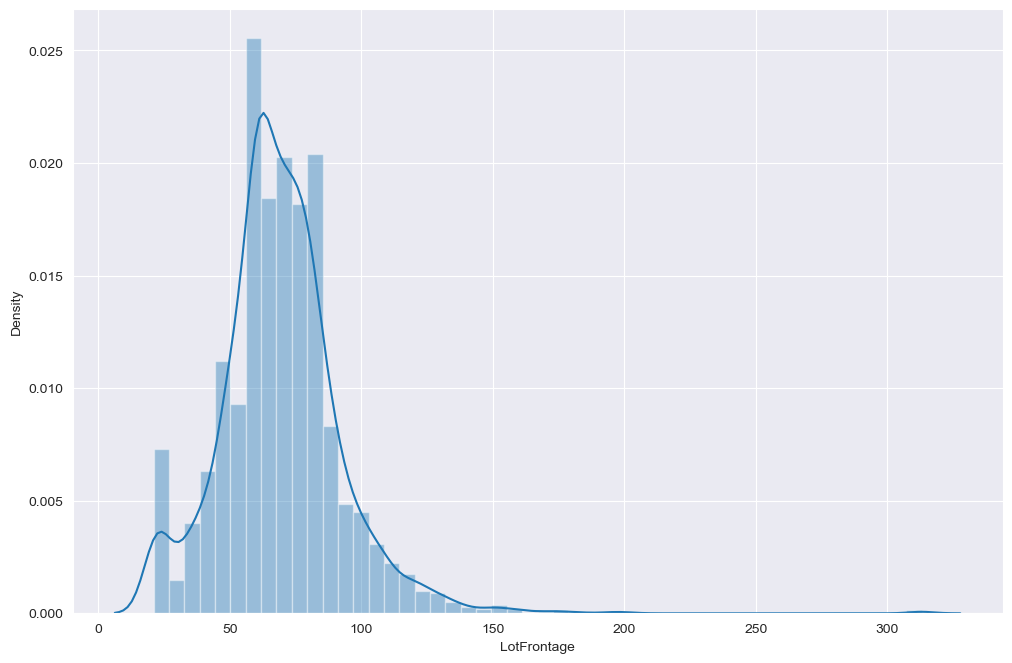

In [9]:
plt.figure(figsize=(12, 8), dpi=100)
sns.distplot(full.LotFrontage.dropna())

In [10]:
full.LotFrontage.fillna(full.LotFrontage.median(), inplace=True)

In [11]:
full.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [12]:
full.Utilities.fillna('AllPub', inplace=True)

<BarContainer object of 15 artists>

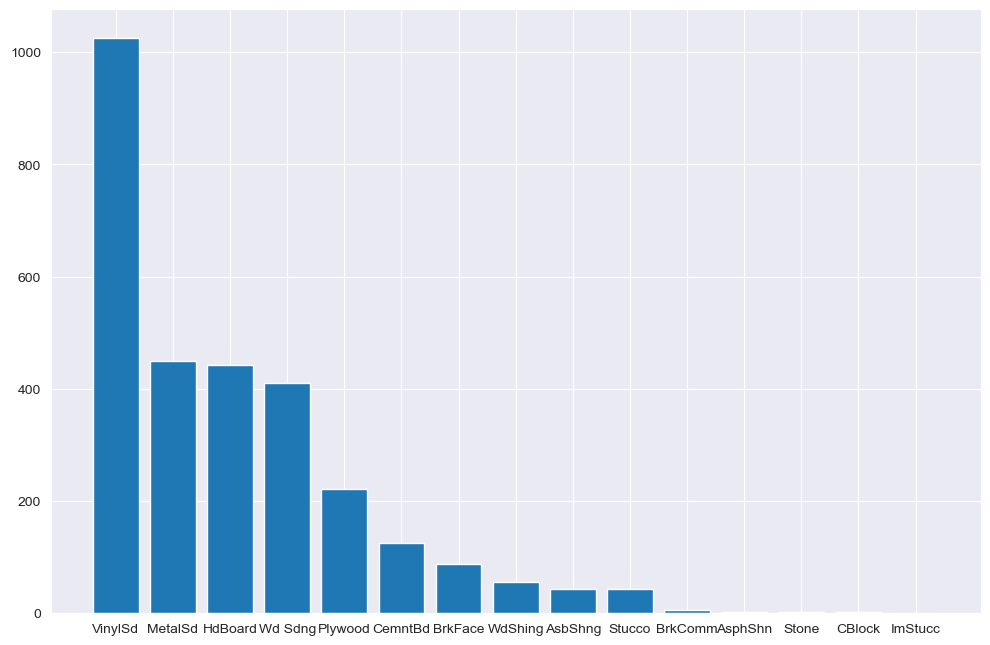

In [13]:
plt.figure(figsize=(12, 8), dpi=100)
plt.bar(full.Exterior1st.value_counts().index, full.Exterior1st.value_counts())

In [14]:
full.Exterior1st.value_counts()
full.Exterior1st.fillna('VinylSd', inplace=True)

In [15]:
full.MSZoning.value_counts()
full.MSZoning.fillna('RL', inplace=True)

In [16]:
full.Exterior2nd.value_counts()
full.Exterior2nd.fillna('VinylSd', inplace=True)

In [17]:
full.MasVnrType.fillna('None', inplace=True)

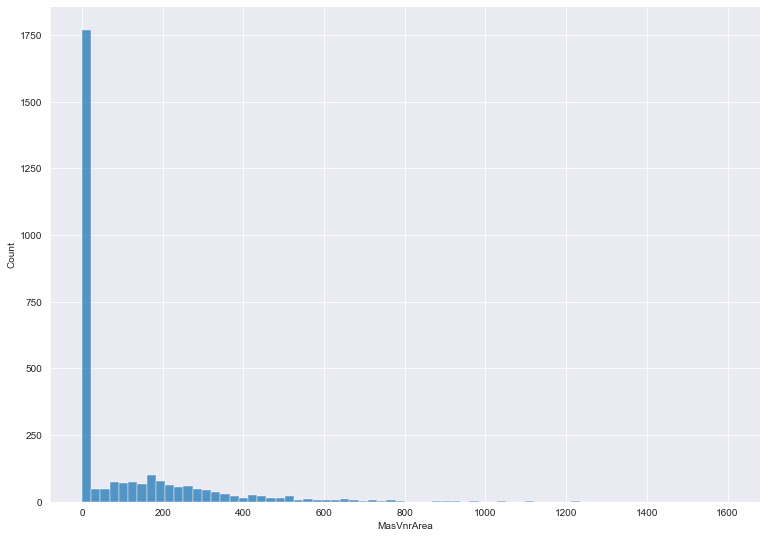

In [18]:
sns.displot(full.MasVnrArea.dropna()).fig.set_size_inches(12, 8)

In [19]:
full.MasVnrArea.fillna(0, inplace=True)

In [20]:
full.BsmtQual.fillna('NoBsmt', inplace=True)
full.BsmtCond.fillna('NoBsmt', inplace=True)
full.BsmtExposure.fillna('NoBsmt', inplace=True)
full.BsmtFinType1.fillna('NoBsmt', inplace=True)
full.BsmtFinType2.fillna('NoBsmt', inplace=True)

In [21]:
full.BsmtFinSF1.fillna(0, inplace=True)
full.BsmtFinSF2.fillna(0, inplace=True)
full.BsmtUnfSF.fillna(0, inplace=True)
full.TotalBsmtSF.fillna(0, inplace=True)

In [22]:
full.Electrical.fillna('SBrkr', inplace=True)
full.BsmtFullBath.fillna(0, inplace=True)
full.BsmtHalfBath.fillna(0, inplace=True)

In [23]:
full.KitchenQual.fillna('TA', inplace=True)
full.Functional.fillna('Typ', inplace=True)

In [24]:
full.FireplaceQu.fillna('NoFireplace', inplace=True)
full.GarageType.fillna('NoGarage', inplace=True)
full.GarageYrBlt.fillna(0, inplace=True)
full.GarageFinish.fillna('NoGarage', inplace=True)
full.GarageQual.fillna('NoGarage', inplace=True)
full.GarageCond.fillna('NoGarage', inplace=True)
full.GarageCars.fillna(0, inplace=True)
full.GarageArea.fillna(0, inplace=True)
full.PoolQC.fillna('NoPool', inplace=True)
full.Fence.fillna('NoFence', inplace=True)
full.MiscFeature.fillna('None', inplace=True)
full.SaleType.fillna('WD', inplace=True)

In [25]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
# LabelEncoder
LE = LabelEncoder()


def label_encoder(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            LE.fit(data[col])
            data[col] = LE.transform(data[col])
    return data

In [28]:
full = label_encoder(full)

In [29]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          2919 non-null   int64  
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   int64  
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   int64  
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [30]:
full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000.0


In [31]:
train = full[full.SalePrice.notnull()]
test = full[full.SalePrice.isnull()]

#### Data Visualization

In [32]:
corr = train.corr()

<Axes: >

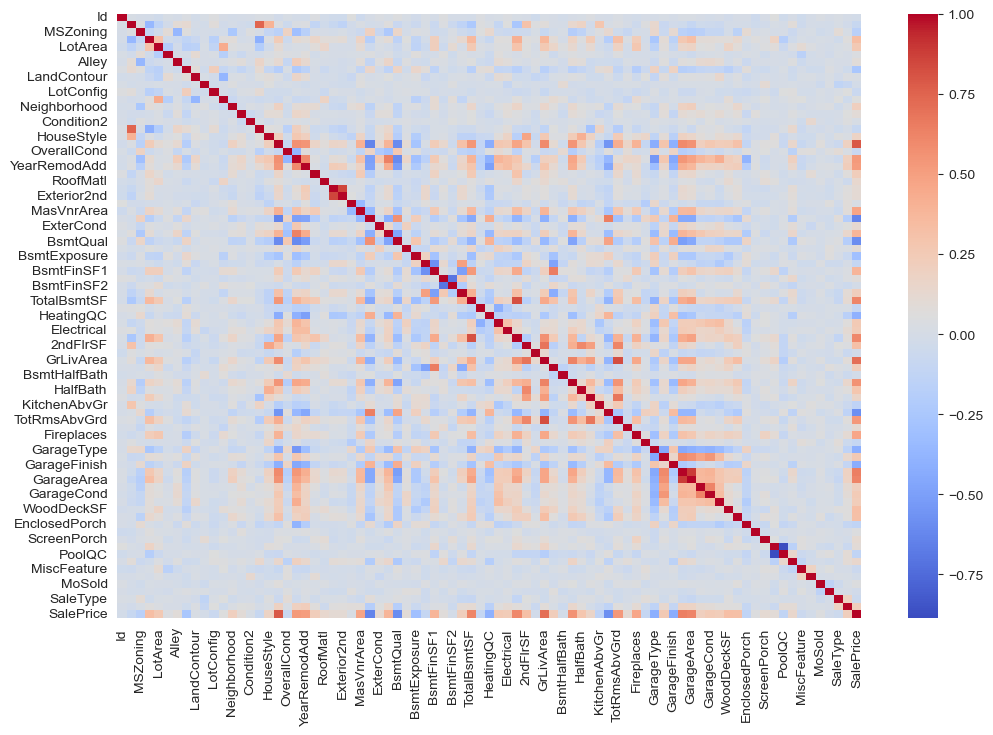

In [33]:
plt.figure(figsize=(12, 8), dpi=100)
sns.heatmap(corr, cmap='coolwarm')

#### Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train.SalePrice

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [38]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [39]:
rf.score(X_test, y_test)

0.8876016610352853

In [40]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
GarageType     -0.415283
GarageFinish   -0.425684
KitchenQual    -0.589189
BsmtQual       -0.593734
ExterQual      -0.636884
Name: SalePrice, Length: 81, dtype: float64

In [41]:
corr_value = corr['SalePrice'].sort_values(ascending=False).where(lambda x: abs(x) > 0.1).dropna().index.to_list()

In [42]:
train = train[corr_value]

In [43]:
train

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,KitchenAbvGr,MSZoning,LotShape,BsmtExposure,HeatingQC,GarageType,GarageFinish,KitchenQual,BsmtQual,ExterQual
0,208500.0,7,1710,2.0,548.0,856.0,856,2,8,2003,...,1,3,3,3,0,1,2,2,2,2
1,181500.0,6,1262,2.0,460.0,1262.0,1262,2,6,1976,...,1,3,3,1,0,1,2,3,2,3
2,223500.0,7,1786,2.0,608.0,920.0,920,2,6,2001,...,1,3,0,2,0,1,2,2,2,2
3,140000.0,7,1717,3.0,642.0,756.0,961,1,7,1915,...,1,3,0,3,2,5,3,2,4,3
4,250000.0,8,2198,3.0,836.0,1145.0,1145,2,9,2000,...,1,3,0,0,0,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,6,1647,2.0,460.0,953.0,953,2,7,1999,...,1,3,3,3,0,1,2,3,2,3
1456,210000.0,6,2073,2.0,500.0,1542.0,2073,2,7,1978,...,1,3,3,3,4,1,3,3,2,3
1457,266500.0,7,2340,1.0,252.0,1152.0,1188,2,9,1941,...,1,3,3,3,0,1,2,2,4,0
1458,142125.0,5,1078,1.0,240.0,1078.0,1078,1,5,1950,...,1,3,3,2,2,1,3,2,4,3


In [44]:
X = train.drop(['SalePrice'], axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [47]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [48]:
rf.score(X_test, y_test)

0.9001896530453107

#### Cross Validation

In [49]:
# Cross Validation

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [50]:
scores

array([-26382.89374401, -36314.670372  , -31706.97622559, -25582.53204297,
       -29985.94837567])

In [51]:
mean_cross_val = np.mean(scores)
mean_cross_val

-29994.604152047938

In [52]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [53]:
rf.score(X_test, y_test)

0.8996845868391388

In [54]:
test = test[corr_value]

In [55]:
X_test_oo = test.drop(['SalePrice'], axis=1)

In [56]:
result = rf.predict(X_test_oo)

In [57]:
result = pd.DataFrame(result)
result.columns = ['SalePrice']

In [58]:
# combine Id and SalePrice
Id = pd.read_csv('test.csv').Id
result = pd.concat([Id, result], axis=1)

In [59]:
result.to_csv('result_rf.csv', index=False)

In [60]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


#### XGBoost Model

In [61]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)

In [62]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [63]:
xgb.score(X_train, y_train)

0.9999823522011833

In [64]:
xgb.score(X_test, y_test)

0.9091687131600469

In [65]:
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [66]:
scores

array([-26170.09209333, -33737.24091781, -28420.14432907, -22107.27476754,
       -23478.45583527])

In [67]:
mean_cross_val = np.mean(scores)

In [68]:
mean_cross_val

-26782.641588601244

In [69]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [70]:
xgb.score(X_train, y_train)

0.9999823522011833

In [71]:
xgb.predict(X_test_oo)

array([130181.984, 151814.33 , 182735.5  , ..., 164332.3  , 113748.79 ,
       210813.94 ], dtype=float32)

In [72]:
result = xgb.predict(X_test_oo)
result = pd.DataFrame(result)
result.columns = ['SalePrice']

In [73]:
# combine Id and SalePrice

Id = pd.read_csv('test.csv').Id
result = pd.concat([Id, result], axis=1)

In [74]:
result.to_csv('result_xgb.csv', index=False)

In [75]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


In [76]:
# LGBoost

In [77]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=1000, learning_rate=0.05)

In [78]:
lgb.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=1000)

In [79]:
lgb.score(X_train, y_train)

0.9989410172747004

In [80]:
lgb.score(X_test, y_test)

0.8812169241748292

In [81]:
scores = cross_val_score(lgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [82]:
scores

array([-31852.70756851, -36093.77630922, -29870.67216324, -28085.45973785,
       -26999.73272538])

In [83]:
mean_cross_val = np.mean(scores)

In [84]:
mean_cross_val

-30580.469700842717

In [85]:
lgb.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=1000)

In [86]:
lgb.score(X_train, y_train)

0.9989410172747004

In [87]:
lgb.predict(X_test_oo)

array([128871.44470736, 154326.24633335, 185152.49252707, ...,
       150469.22021163, 125428.80725453, 224089.68129579])

In [88]:
result = lgb.predict(X_test_oo)

In [89]:
result = pd.DataFrame(result)
result.columns = ['SalePrice']

In [90]:
# combine Id and SalePrice

Id = pd.read_csv('test.csv').Id
result = pd.concat([Id, result], axis=1)

In [91]:
result.to_csv('result_lgb.csv', index=False)

In [92]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


### Tensorflow

In [93]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

ImportError: cannot import name 'deserialize_keras_object' from partially initialized module 'keras.saving.legacy.serialization' (most likely due to a circular import) (/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/keras/saving/legacy/serialization.py)

In [ ]:
### Model

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

In [ ]:
test = test[corr_value]

In [ ]:
test

In [ ]:
X_test_oo = test.drop(['SalePrice'], axis=1)

In [ ]:
result = model.predict(X_test_oo)

In [ ]:
result = pd.DataFrame(result)

In [ ]:
result.columns = ['SalePrice']

In [ ]:
# combine Id and SalePrice

Id = pd.read_csv('test.csv').Id
result = pd.concat([Id, result], axis=1)

In [ ]:
result.to_csv('result_tf.csv', index=False)

In [ ]:
result.info()

### optimize the XGBoost model

In [ ]:
train_corr = train.corr()['SalePrice'].sort_values(ascending=False)

In [ ]:
# drop the columns which have low correlation with SalePrice

train_corr = train_corr.where(lambda x: abs(x) > 0.2).dropna().index.to_list()

In [ ]:
train_corr

In [ ]:
train = train[train_corr]

In [ ]:
sns.heatmap(train.corr(), cmap='coolwarm')

In [ ]:
X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
xgb.score(X_train, y_train)

In [ ]:
xgb.score(X_test, y_test)

In [ ]:
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [ ]:
mean_cross_val = np.mean(scores)
mean_cross_val

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
xgb.score(X_train, y_train)

In [ ]:
test = test[train_corr]
test

In [ ]:
X_test_oo = test.drop(['SalePrice'], axis=1)

In [ ]:
result = xgb.predict(X_test_oo)

In [ ]:
result = pd.DataFrame(result)
result.columns = ['SalePrice']

In [ ]:
# combine Id and SalePrice

Id = pd.read_csv('test.csv').Id
result = pd.concat([Id, result], axis=1)

In [ ]:
result.to_csv('result_xgb_opt.csv', index=False)

In [ ]:
result.info()

### Try a new model

In [ ]:
data